<h1>Procesamiento de archivos de Texto</h1>

Importar las librerias necesarias

In [1]:
import pandas as pd
import nltk as nk
import matplotlib.pyplot as plt
import numpy as np
import re
import codecs
from nltk.corpus import stopwords

Configurar carpeta de entrada de los archivos  y descargar los modelos entrenados de nltk para procesar un dato.

In [2]:
input_path = './input/'

In [3]:
nk.download('punkt')
nk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lectura de archivo ejercicio
Leer el archivo de texto de prueba `0704.3507.pdf.txt` (al ser un archivo pequeño podemos utilizar el siguiente acercamiento en otro tipo de archivos se procesaría de manera distinta. Al terminar la lectura generamos los tokens que se utilizarán para el análisis para este primer resultado tenemos 5699 tokens.

In [4]:
with open(input_path+'0704.3504.pdf.txt', 'r', encoding='utf-8') as myfile:
    tokens = nk.word_tokenize(myfile.read())

print(len(tokens))
print(tokens)
    

5699
['ar', 'X', 'iv', ':0', '70', '4', '.', '35', '04', 'v1', '[', 'qu', 'an', 't-', 'ph', ']', '2', '6', 'A', 'pr', '2', '00', '7', 'Smooth', 'Rényi', 'Entropy', 'of', 'Ergodic', 'Quantum', 'Information', 'Sources', 'Berry', 'Schoenmakers', 'Jilles', 'Tjoelker', 'Dept', '.', 'of', 'Mathematics', 'and', 'Computer', 'Science', 'Technical', 'University', 'Eindhoven', 'The', 'Netherlands', 'berry', '@', 'win.tue.nl', 'j.tjoelker', '@', 'student.tue.nl', 'Pim', 'Tuyls', 'Information', 'Security', 'Systems', 'Philips', 'Research', 'Eindhoven', 'The', 'Netherlands', 'pim.tuyls', '@', 'philips.com', 'Evgeny', 'Verbitskiy', 'Digital', 'Signal', 'Processing', 'Philips', 'Research', 'Eindhoven', 'The', 'Netherlands', 'evgeny.verbitskiy', '@', 'philips.com', 'Abstract—', 'We', 'investigate', 'the', 'recently', 'introduced', 'notion', 'of', 'smooth', 'Rényi', 'entropy', 'for', 'the', 'case', 'of', 'ergodic', 'information', 'sources', ',', 'thereby', 'generalizing', 'previous', 'work', 'which', 

## Aplicar tokenización y selección de palabras más comunes
De los tokens extraidos de se deben seleccionar aquellos que correspondan solo a palabras de mas de dos letras y que cumplan con la condición de ser alfanumericos. Despues de aplicar estos filtros se obtienen 1784 palabras de las cuales ya solo debemos aplicar los filtros necesarios



In [5]:
tokens = [re.sub(r'[^A-Za-z0-9]','', tok.lower()) for tok in tokens if len(tok) > 1]    
tokens = [tok for tok in tokens if tok not in set(stopwords.words('english'))]
tokens = [tok for tok in tokens if len(tok) > 1]
print(len(tokens))
print(tokens)


1630
['ar', 'iv', '70', '35', '04', 'v1', 'qu', 'ph', 'pr', '00', 'smooth', 'renyi', 'entropy', 'ergodic', 'quantum', 'information', 'sources', 'berry', 'schoenmakers', 'jilles', 'tjoelker', 'dept', 'mathematics', 'computer', 'science', 'technical', 'university', 'eindhoven', 'netherlands', 'berry', 'wintuenl', 'jtjoelker', 'studenttuenl', 'pim', 'tuyls', 'information', 'security', 'systems', 'philips', 'research', 'eindhoven', 'netherlands', 'pimtuyls', 'philipscom', 'evgeny', 'verbitskiy', 'digital', 'signal', 'processing', 'philips', 'research', 'eindhoven', 'netherlands', 'evgenyverbitskiy', 'philipscom', 'abstract', 'investigate', 'recently', 'introduced', 'notion', 'smooth', 'renyi', 'entropy', 'case', 'ergodic', 'information', 'sources', 'thereby', 'generalizing', 'previous', 'work', 'concentrated', 'mainly', 'iid', 'information', 'sources', 'actually', 'consider', 'ergodic', 'quantum', 'information', 'sources', 'ergodic', 'classical', 'infor', 'mation', 'sources', 'special', 'c

mirar las `20` palabras mas comunes del texto que son las que hacen parte del $BoW$

In [6]:
freq_text = nk.FreqDist(tokens)
mostcommon = freq_text.most_common(20)
print(mostcommon)

[('entropy', 52), ('zn', 39), ('quantum', 38), ('case', 38), ('renyi', 32), ('smooth', 31), ('classical', 26), ('source', 24), ('probability', 23), ('ergodic', 20), ('sources', 19), ('theorem', 19), ('log', 18), ('information', 17), ('renner', 17), ('closeness', 17), ('density', 16), ('let', 16), ('lemma', 16), ('notion', 15)]


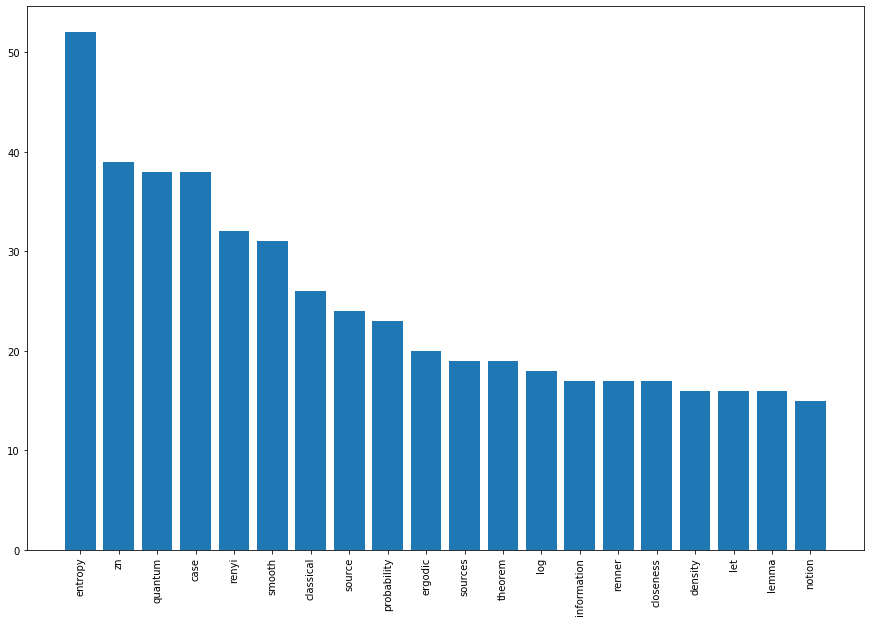

In [7]:
#se graficn estas palabras usando:
x,y = zip(*mostcommon)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## Aplicar 'Stem' truncado de palabras o singularizar palabras
Podemos aplicar stem para truncar las palabras y obtener la parte singular de las mismas dentro de la libreria nltk como veremos acontinuación:

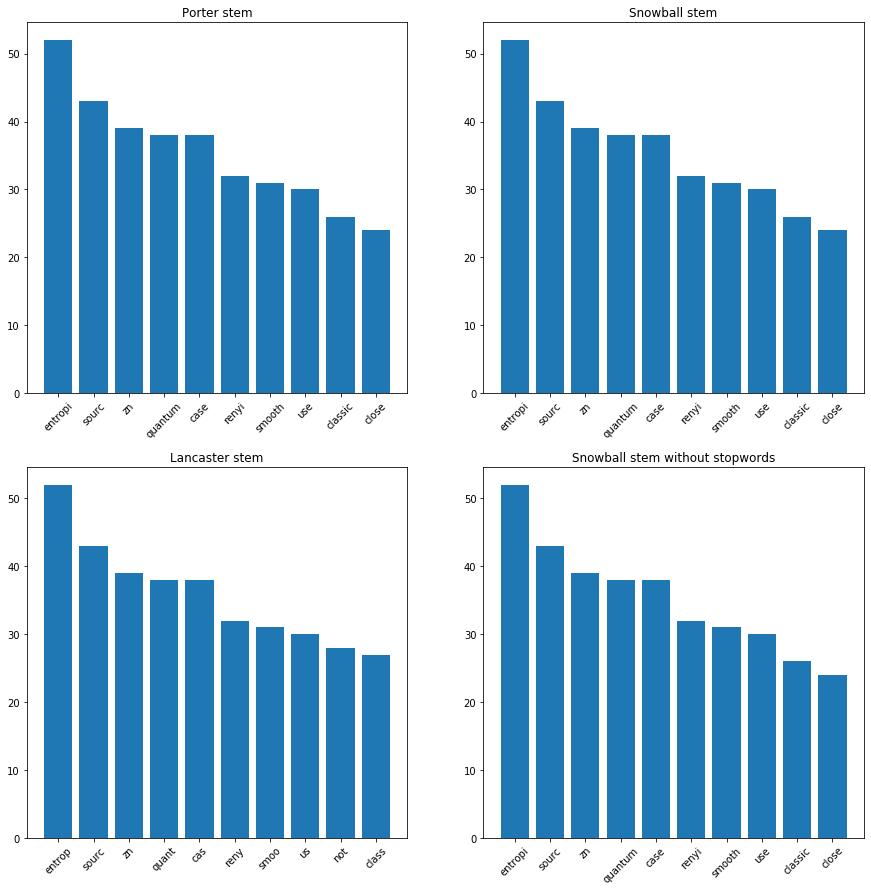

In [8]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')
snowball2 = SnowballStemmer('english', ignore_stopwords=True)

tok_porter = [porter.stem(tok) for tok in tokens]
tok_lancaster = [lancaster.stem(tok) for tok in tokens]
tok_snowball = [snowball.stem(tok) for tok in tokens]
tok_snowball2 = [snowball2.stem(tok) for tok in tokens]

por_dist = nk.FreqDist(tok_porter)
lan_dist = nk.FreqDist(tok_lancaster)
sno_dist = nk.FreqDist(tok_snowball)
sno_dist2 = nk.FreqDist(tok_snowball2)

por_mostcommon = por_dist.most_common(10)
lan_mostcommon = lan_dist.most_common(10)
sno_mostcommon = sno_dist.most_common(10)
sno_mostcommon2 = sno_dist2.most_common(10)



fig, axs = plt.subplots(2, 2, figsize=(15, 15))
x,y = zip(*por_mostcommon)
axs[0, 0].bar(x,y)
axs[0, 0].set_title('Porter stem')
for tick in axs[0, 0].get_xticklabels():
    tick.set_rotation(45)

x,y = zip(*lan_mostcommon)
axs[1, 0].bar(x,y)
axs[1, 0].set_title('Lancaster stem')
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(45)

x,y = zip(*sno_mostcommon)
axs[0, 1].bar(x,y)
axs[0, 1].set_title('Snowball stem')
for tick in axs[0, 1].get_xticklabels():
    tick.set_rotation(45)

x,y = zip(*sno_mostcommon2)
axs[1, 1].bar(x,y)
axs[1, 1].set_title('Snowball stem without stopwords')
plt.xticks(rotation=45)

plt.show()

## Lemmatization
Funciona similar al stem pero este agrupa palabras con significado similirar como se muestra acontinuacion:

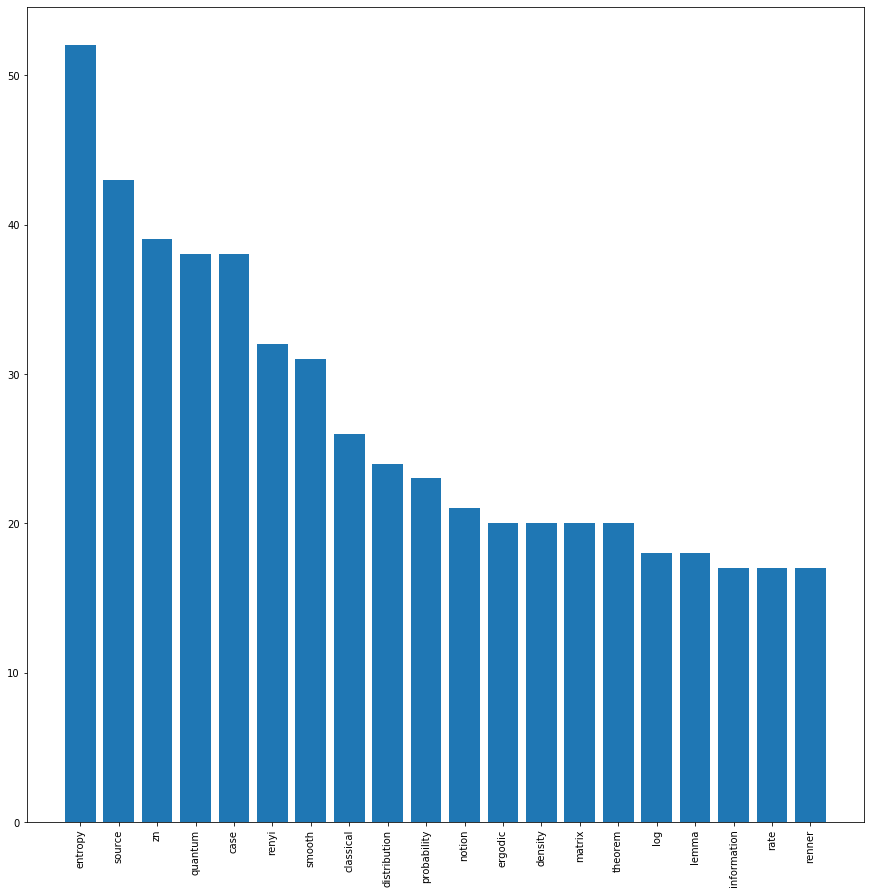

In [9]:
from nltk.stem import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

word_lemma = [word_lemmatizer.lemmatize(w) for w in tokens]
word_dist = nk.FreqDist(word_lemma)
topwords = word_dist.most_common(20)

x,y = zip(*topwords)
plt.figure(figsize=(15,15))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

observamos que en el caso de `sources` aumenta su valor porque `source` tambien esta en la lista por loq eu se mejora aun mas el resultado


# Conclusiones
Observamos que con este acercamiento podemos implementar un filtrado sobre el lenguaje natural y obtener un mejor analisis podriamos determinar sentimientos o implementar busquedas de texto en fuentes grandes

# Acercamiento usando Pyspark

En esta sección se realiza una operación similar utilizando spark

In [10]:
import pyspark
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SQLContext

#tipos de datos spark
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType,DoubleType,IntegerType, ArrayType


sc = SparkContext.getOrCreate(SparkConf())

#leer todos los archivos de una carpeta
rdd = sc.wholeTextFiles(path=input_path+'*')

#crear un esquema para almacenar los datos
schemafiles = StructType([StructField('nombre_archivo', StringType(), True),
                          StructField('contenido_archivo', StringType(), True)])

sqlContext = SQLContext(sc)
df = sqlContext.createDataFrame(rdd, schemafiles)
#el resultado parece vacío por la cantidad de nuevas lineas al inicio del archivo
df.show()

+--------------------+--------------------+
|      nombre_archivo|   contenido_archivo|
+--------------------+--------------------+
|file:/C:/Users/us...|
















...|
+--------------------+--------------------+



In [11]:
from pyspark.ml.feature import Tokenizer
tokenization=Tokenizer(inputCol='contenido_archivo',outputCol='tokens')
tokenized_df=tokenization.transform(df)
tokenized_df.show(1,False) #muestra una fila con el contenido de los tokens

+-------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import pandas_udf, PandasUDFType, udf,length
stopword_removal=StopWordsRemover(inputCol='tokens',outputCol='refined_tokens')
refined_df = stopword_removal.transform(tokenized_df)
refined_df = refined_df.select(['nombre_archivo','tokens','refined_tokens','contenido_archivo'])

def count_elements_array(list_tokens):
    return len(list_tokens)

length_udf = udf(count_elements_array, IntegerType())

#show resume
df2 = (refined_df.withColumn('nombre_archivo', refined_df.nombre_archivo)
       .withColumn('longitud_texto_original', length(refined_df.contenido_archivo))
       .withColumn('qty_tokens', length_udf(refined_df['tokens']))
       .withColumn('qty_refined_tokens', length_udf(refined_df['refined_tokens']))
)
df2.select(['nombre_archivo', 'qty_tokens', 'qty_refined_tokens']).show()

+--------------------+----------+------------------+
|      nombre_archivo|qty_tokens|qty_refined_tokens|
+--------------------+----------+------------------+
|file:/C:/Users/us...|      4347|              3212|
+--------------------+----------+------------------+



Se observa que el Tokenizer de spark tiene un rendimiento algo inferior al funcionamiento de del de la libreria nltk pero tambien podemos usar las funciones de nltk para este proceso. Ejemplo obtener los tokens mas usados.


In [14]:
def most_common_tok(list_tokens):
    tokens = [re.sub(r'[^A-Za-z0-9]','', tok.lower()) for tok in list_tokens if len(tok) > 1]    
    tokens = [tok for tok in tokens if tok not in set(stopwords.words('english'))]
    tokens = [tok for tok in tokens if len(tok) > 1]
    freq_text = nk.FreqDist(tokens)
    mostcommon = [w for w in freq_text.most_common(20)]
    return mostcommon

freq_udf = udf(most_common_tok, ArrayType(StructType([
    StructField("word", StringType(), False), 
    StructField("count",IntegerType(), False)
])))

refined_df = refined_df.withColumn("most_freq", freq_udf(refined_df['refined_tokens']) )




ahora podemos ver el estado de la primera fila para comperarlo con el resultado anterior

In [15]:
print(refined_df.select("most_freq").take(1))

[Row(most_freq=[Row(word='entropy', count=52), Row(word='quantum', count=38), Row(word='case', count=38), Row(word='renyi', count=32), Row(word='smooth', count=31), Row(word='hp', count=30), Row(word='classical', count=26), Row(word='source', count=23), Row(word='probability', count=23), Row(word='ergodic', count=20), Row(word='sources', count=20), Row(word='theorem', count=19), Row(word='information', count=17), Row(word='renner', count=17), Row(word='closeness', count=17), Row(word='density', count=16), Row(word='let', count=16), Row(word='lemma', count=16), Row(word='qzn', count=16), Row(word='notion', count=15)])]


Tambien podemos observar que la estructura sigue siendo de una fila como se muestra acontinuación

In [16]:
refined_df.select(['nombre_archivo','tokens','refined_tokens', 'most_freq']).show()

+--------------------+--------------------+--------------------+--------------------+
|      nombre_archivo|              tokens|      refined_tokens|           most_freq|
+--------------------+--------------------+--------------------+--------------------+
|file:/C:/Users/us...|[, , , , , , , , ...|[, , , , , , , , ...|[[entropy, 52], [...|
+--------------------+--------------------+--------------------+--------------------+

